In [368]:
import pandas as pd

In [369]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [371]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], dtype=int)
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,1,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,0,0,0,1,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,0,0,0,1,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,0,1,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,0,1,...,0,0,0,0,1,0,1,0,0,0


In [372]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [373]:
from sklearn.preprocessing import StandardScaler
import pickle

standard = StandardScaler()
x_train[['age', 'trestbps', 'chol', 'thalach']] = standard.fit_transform(x_train[['age', 'trestbps', 'chol', 'thalach']])
x_test[['age', 'trestbps', 'chol', 'thalach']] = standard.transform(x_test[['age', 'trestbps', 'chol', 'thalach']])

with open("scaler.pkl", "wb") as file:
    pickle.dump(standard, file)

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
135,-0.618618,0,-0.091350,0.490710,0,0.547560,0,0.0,1,0,...,1,0,0,1,0,1,0,0,0,0
89,0.390205,0,-1.741881,0.050081,0,-1.232982,0,1.0,1,0,...,0,0,0,1,0,1,0,0,0,0
232,0.053931,1,1.559181,0.910357,0,-0.234142,1,0.8,1,0,...,0,0,0,0,1,0,1,0,0,0
243,0.278114,1,1.119039,0.595622,0,-2.709529,1,1.2,1,0,...,0,0,0,0,1,0,1,0,0,0
291,0.390205,1,-0.971633,1.518846,0,-0.451281,0,4.4,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.502297,1,2.109358,0.889375,0,0.373848,0,0.2,0,0,...,0,0,0,0,1,1,0,0,0,0
181,1.174846,0,1.009004,-0.432514,0,-1.580405,0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
57,-1.066984,1,-0.916616,0.301869,0,1.502972,0,0.0,1,0,...,1,0,0,1,0,1,0,0,0,0
295,0.950663,1,0.458827,-1.229843,0,-0.277570,1,4.0,1,0,...,1,0,0,0,1,0,0,1,0,0


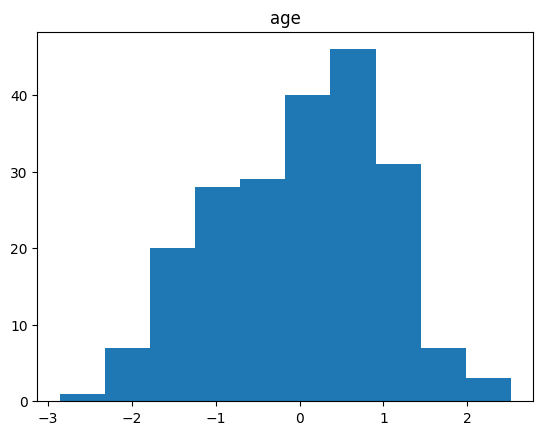

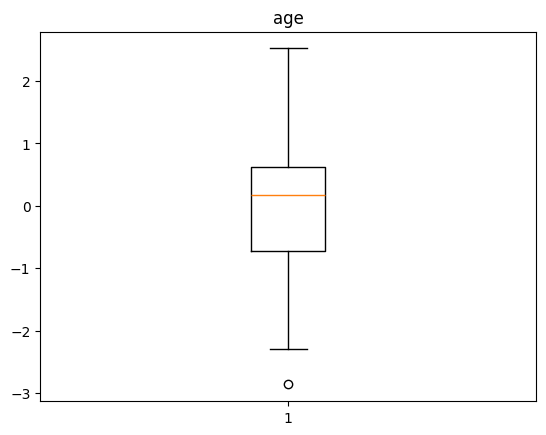

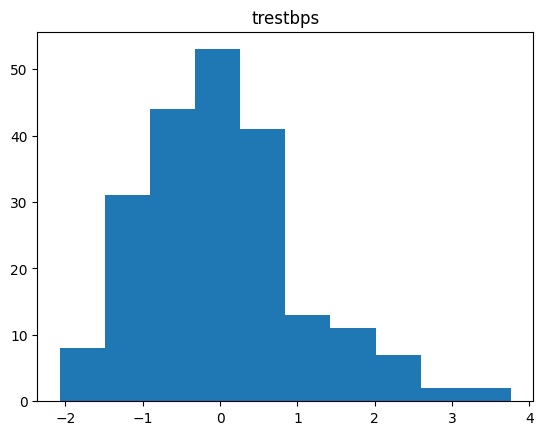

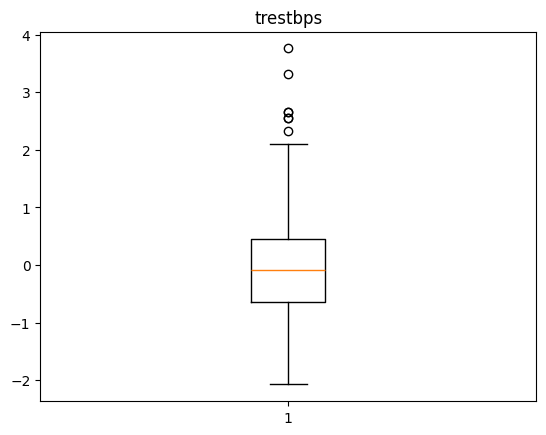

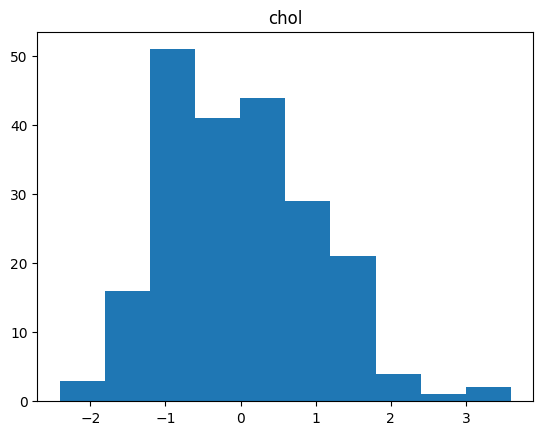

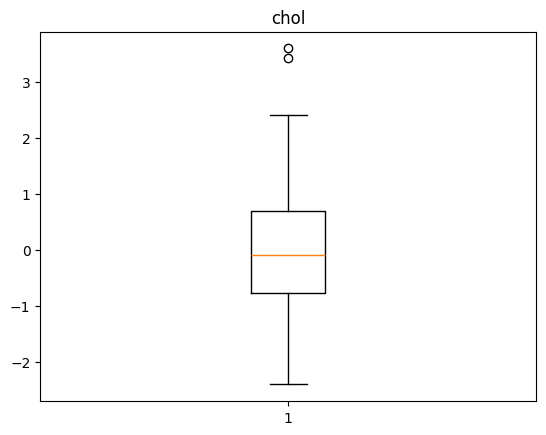

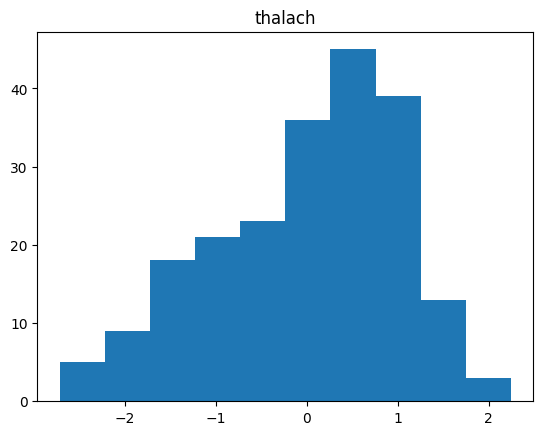

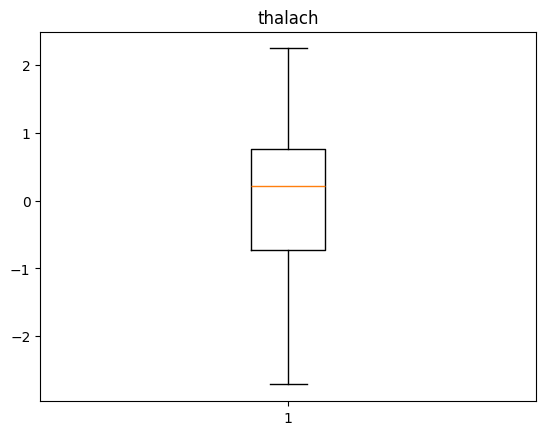

In [374]:
import matplotlib.pyplot as plt

num_variables = ['age', 'trestbps', "chol", "thalach"]
for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()

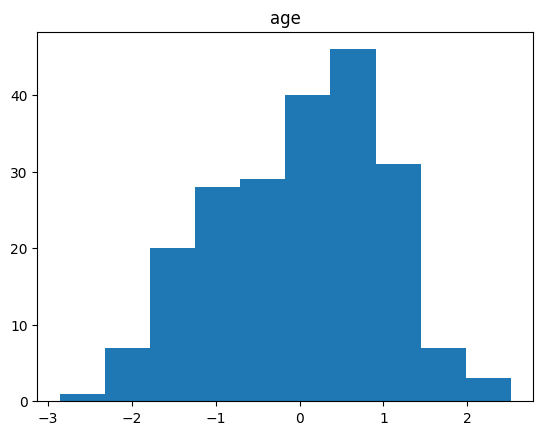

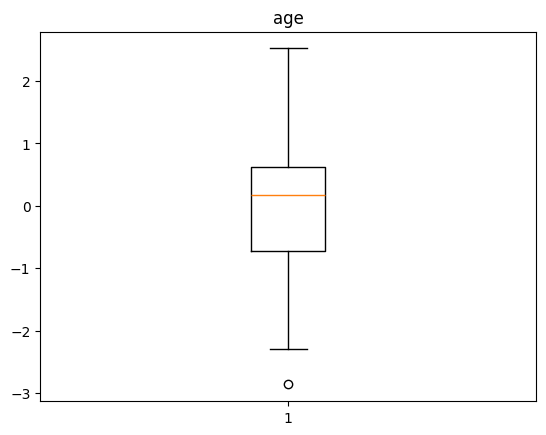

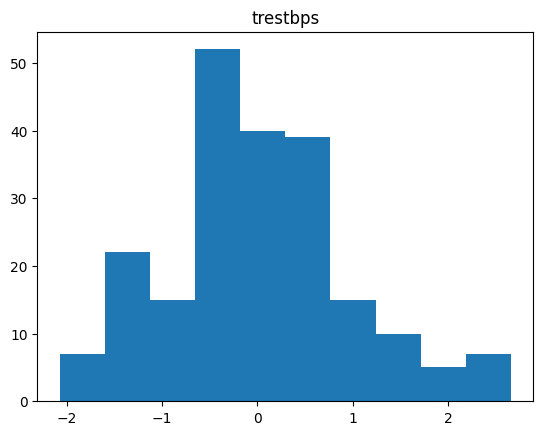

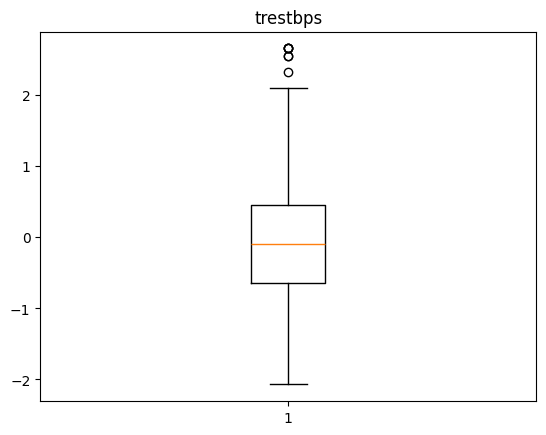

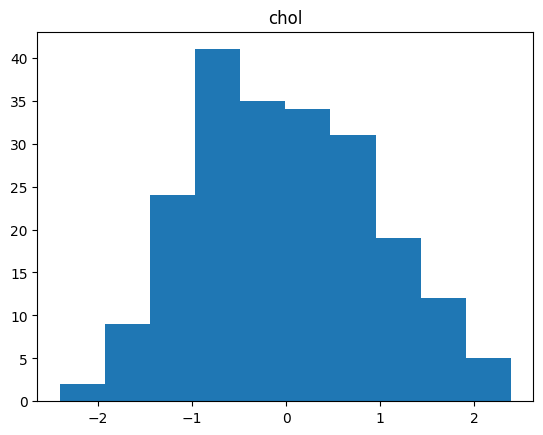

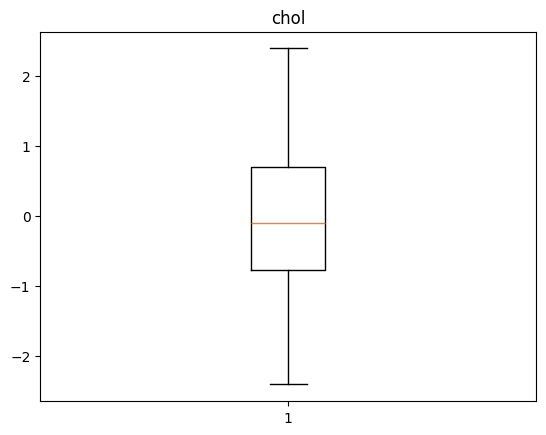

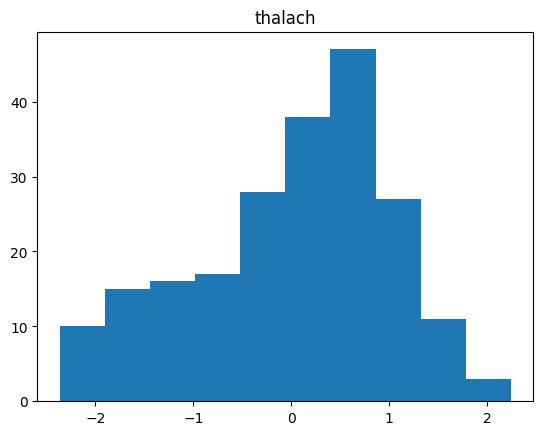

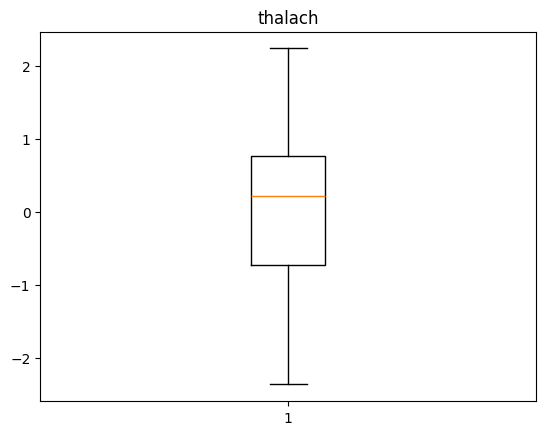

In [375]:
import numpy as np

x_train['trestbps'] = np.where(x_train['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_train['trestbps'])
x_test['trestbps'] = np.where(x_test['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_test['trestbps'])

x_train['chol'] = np.where(x_train['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_train['chol'])
x_test['chol'] = np.where(x_test['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_test['chol'])

x_train['thalach'] = np.where(x_train['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_train['thalach'])
x_test['thalach'] = np.where(x_test['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_test['thalach'])

for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()


<Axes: >

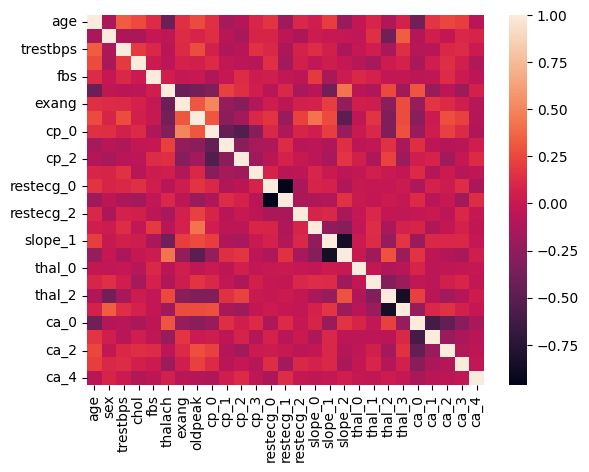

In [376]:
import seaborn as sns

sns.heatmap(x_train.corr())

In [377]:
x_train[['age', 'trestbps', 'chol', 'thalach']].describe()

,age,trestbps,chol,thalach
count,2.120000e+02,212.000000,212.000000,212.000000
mean,7.122185e-17,-0.008305,-0.010687,0.001844
std,1.002367e+00,0.975953,0.970203,0.997699
min,-2.860449e+00,-2.071988,-2.404856,-2.362106
25%,-7.307098e-01,-0.641527,-0.773477,-0.722705
50%,1.660223e-01,-0.091350,-0.096796,0.221851
75%,6.143884e-01,0.458827,0.695288,0.764699
max,2.519944e+00,2.659535,2.386256,2.241246


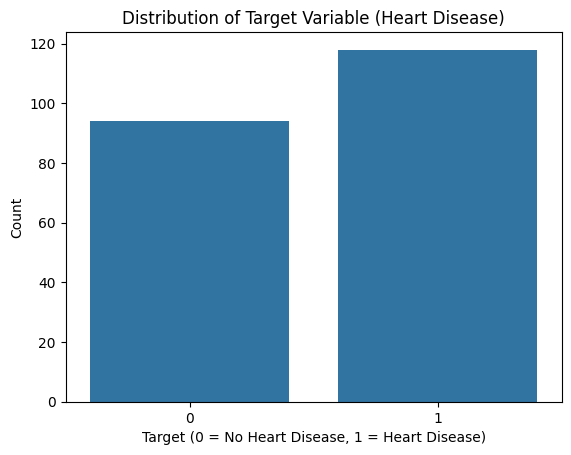

In [378]:
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

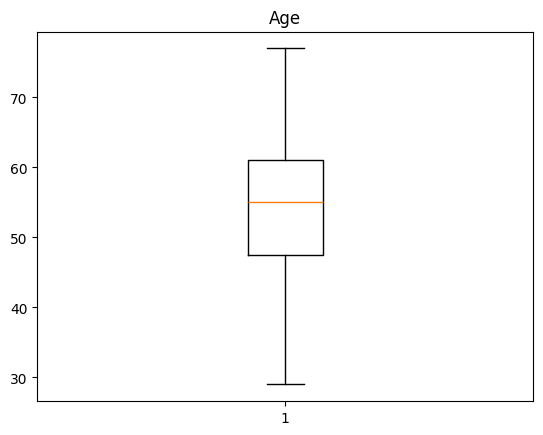

In [379]:
plt.boxplot(data['age'])
plt.title('Age')
plt.show()

In [380]:
x_train['age_range'] = pd.cut(data.loc[x_train.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
x_test['age_range'] = pd.cut(data.loc[x_test.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

x_train['age_chol'] = x_train['age'] * x_train['chol']
x_test['age_chol'] = x_test['age'] * x_test['chol']

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,age_range,age_chol
135,-0.618618,0,-0.091350,0.490710,0,0.547560,0,0.0,1,0,...,0,1,0,1,0,0,0,0,40-50,-0.303562
89,0.390205,0,-1.741881,0.050081,0,-1.232982,0,1.0,1,0,...,0,1,0,1,0,0,0,0,50-60,0.019542
232,0.053931,1,1.559181,0.910357,0,-0.234142,1,0.8,1,0,...,0,0,1,0,1,0,0,0,50-60,0.049096
243,0.278114,1,1.119039,0.595622,0,-2.362106,1,1.2,1,0,...,0,0,1,0,1,0,0,0,50-60,0.165651
291,0.390205,1,-0.971633,1.518846,0,-0.451281,0,4.4,1,0,...,1,0,0,0,0,0,1,0,50-60,0.592662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.502297,1,2.109358,0.889375,0,0.373848,0,0.2,0,0,...,0,0,1,1,0,0,0,0,50-60,0.446730
181,1.174846,0,1.009004,-0.432514,0,-1.580405,0,1.0,1,0,...,0,0,1,0,0,0,1,0,60-70,-0.508137
57,-1.066984,1,-0.916616,0.301869,0,1.502972,0,0.0,1,0,...,0,1,0,1,0,0,0,0,40-50,-0.322089
295,0.950663,1,0.458827,-1.229843,0,-0.277570,1,4.0,1,0,...,0,0,1,0,0,1,0,0,60-70,-1.169167


In [381]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

x_train['age_range'] = label.fit_transform(x_train['age_range'])
x_test['age_range'] = label.transform(x_test['age_range'])


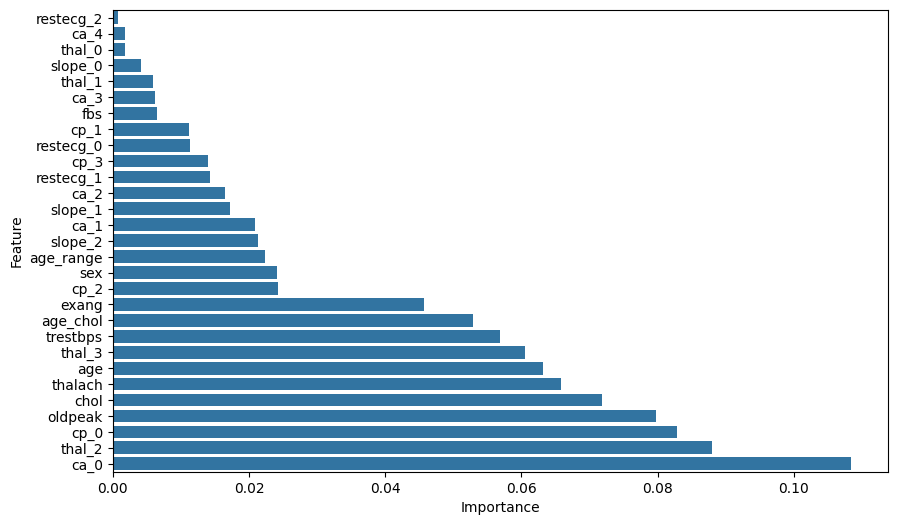

In [382]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.show()

In [383]:
threshold = 0.03

important_features = importance[importance['Importance'] > threshold]['Feature'].tolist()

x_train = x_train[important_features]
x_test = x_test[important_features]

print("Selected features:", important_features)

with open("features.pkl", "wb") as f:
    pickle.dump(important_features, f)

x_train

Selected features: ['exang', 'age_chol', 'trestbps', 'thal_3', 'age', 'thalach', 'chol', 'oldpeak', 'cp_0', 'thal_2', 'ca_0']


,exang,age_chol,trestbps,thal_3,age,thalach,chol,oldpeak,cp_0,thal_2,ca_0
135,0,-0.303562,-0.091350,0,-0.618618,0.547560,0.490710,0.0,1,1,1
89,0,0.019542,-1.741881,0,0.390205,-1.232982,0.050081,1.0,1,1,1
232,1,0.049096,1.559181,1,0.053931,-0.234142,0.910357,0.8,1,0,0
243,1,0.165651,1.119039,1,0.278114,-2.362106,0.595622,1.2,1,0,0
291,0,0.592662,-0.971633,0,0.390205,-0.451281,1.518846,4.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
228,0,0.446730,2.109358,1,0.502297,0.373848,0.889375,0.2,0,0,1
181,0,-0.508137,1.009004,1,1.174846,-1.580405,-0.432514,1.0,1,0,0
57,0,-0.322089,-0.916616,0,-1.066984,1.502972,0.301869,0.0,1,1,1
295,1,-1.169167,0.458827,1,0.950663,-0.277570,-1.229843,4.0,1,0,0


Logistic Regression Results:
Accuracy: 0.8681318681318682
Precision: 0.8888888888888888
Recall: 0.851063829787234
F1 Score: 0.8695652173913043
AUC Score: 0.9366537717601547
K-fold cross vaditation accuracy: [0.86046512 0.72093023 0.80952381 0.80952381 0.88095238]
K-fold cross vaditation mean accuracy: 0.8162790697674417


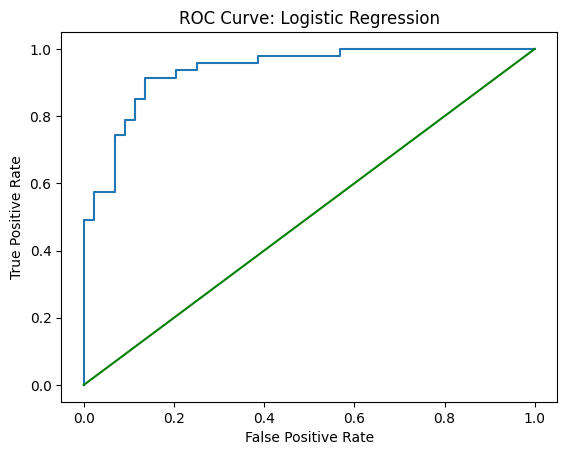

Decision Tree Classifier Results:
Accuracy: 0.7362637362637363
Precision: 0.7804878048780488
Recall: 0.6808510638297872
F1 Score: 0.7272727272727273
AUC Score: 0.7381528046421664
K-fold cross vaditation accuracy: [0.81395349 0.79069767 0.61904762 0.76190476 0.76190476]
K-fold cross vaditation mean accuracy: 0.7495016611295681


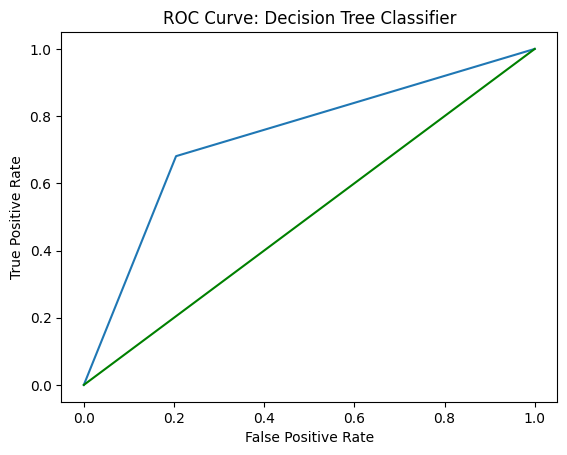

Random Forest Classifier Results:
Accuracy: 0.8241758241758241
Precision: 0.8297872340425532
Recall: 0.8297872340425532
F1 Score: 0.8297872340425532
AUC Score: 0.9110251450676982
K-fold cross vaditation accuracy: [0.86046512 0.74418605 0.73809524 0.69047619 0.83333333]
K-fold cross vaditation mean accuracy: 0.773311184939092


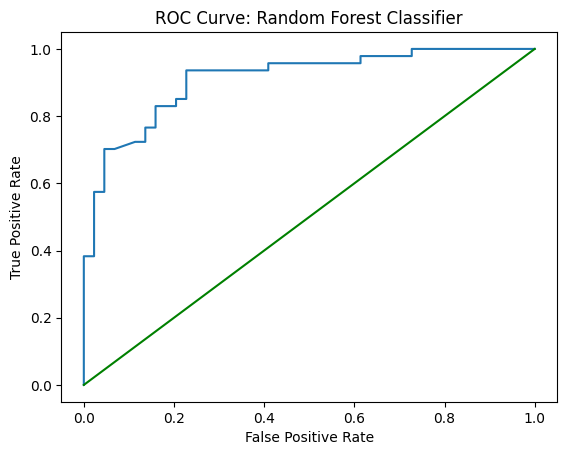

SVC Results:
Accuracy: 0.8571428571428571
Precision: 0.8695652173913043
Recall: 0.851063829787234
F1 Score: 0.8602150537634409
AUC Score: 0.9274661508704062
K-fold cross vaditation accuracy: [0.86046512 0.69767442 0.76190476 0.76190476 0.88095238]
K-fold cross vaditation mean accuracy: 0.7925802879291252


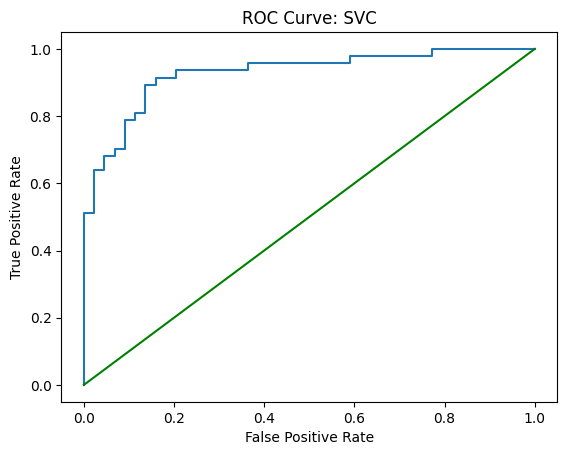

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_model_predict = lg_model.predict(x_test)
lg_model_probs = lg_model.predict_proba(x_test)[:, 1]
lg_cross_valid = cross_val_score(lg_model, x_train, y_train, cv=5)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lg_model_predict):}")
print(f"Precision: {precision_score(y_test, lg_model_predict):}")
print(f"Recall: {recall_score(y_test, lg_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lg_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lg_model_probs)}")
print(f"K-fold cross vaditation accuracy: {lg_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {lg_cross_valid.mean()}")

lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_model_probs)
plt.plot(lg_fpr, lg_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_model_predict = dtc_model.predict(x_test)
dtc_model_probs = dtc_model.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(dtc_model, x_train, y_train, cv=5)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {dtc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model_predict = rfc_model.predict(x_test)
rfc_model_probs = rfc_model.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(rfc_model, x_train, y_train, cv=5)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {rfc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


svc_model = SVC(probability=True)
svc_model.fit(x_train, y_train)
svc_model_predict = svc_model.predict(x_test)
svc_model_probs = svc_model.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(svc_model, x_train, y_train, cv=5)

print("SVC Results:")
print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {svc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Logistic Regression Results:
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8681318681318682
Precision: 0.8888888888888888
Recall: 0.851063829787234
F1 Score: 0.8695652173913043
AUC Score: 0.9298839458413927
K-fold cross validation accuracy: [0.8372093  0.74418605 0.76190476 0.78571429 0.88095238]
K-fold cross validation mean accuracy: 0.8019933554817275


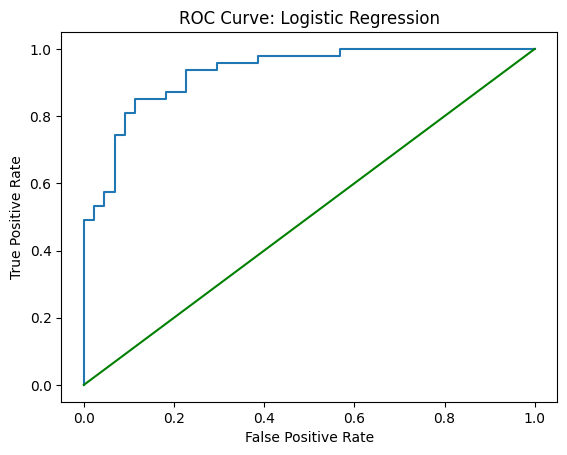

Decision Tree Classifier Results:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7142857142857143
Precision: 0.7692307692307693
Recall: 0.6382978723404256
F1 Score: 0.6976744186046512
AUC Score: 0.7669245647969052
K-fold cross validation accuracy: [0.81395349 0.69767442 0.5952381  0.73809524 0.80952381]
K-fold cross validation mean accuracy: 0.7308970099667775


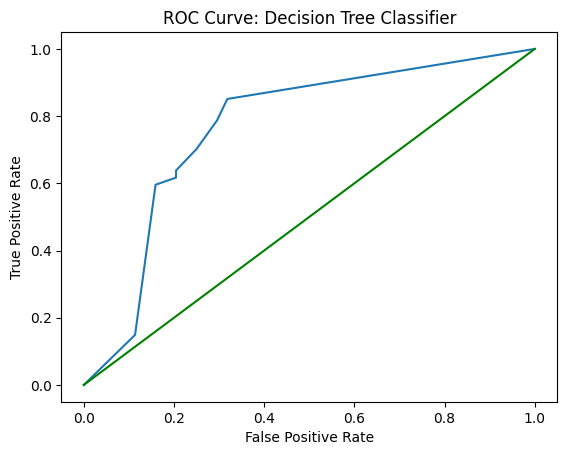

Random Forest Classifier Results:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8351648351648352
Precision: 0.8478260869565217
Recall: 0.8297872340425532
F1 Score: 0.8387096774193549
AUC Score: 0.9231141199226306
K-fold cross validation accuracy: [0.81395349 0.74418605 0.78571429 0.76190476 0.83333333]
K-fold cross validation mean accuracy: 0.7878183831672204


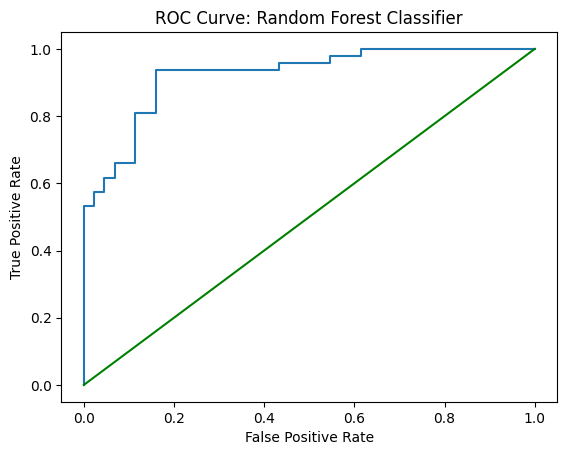

SVC Results:
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8351648351648352
Precision: 0.8333333333333334
Recall: 0.851063829787234
F1 Score: 0.8421052631578947
AUC Score: 0.922147001934236
K-fold cross validation accuracy: [0.86046512 0.79069767 0.78571429 0.83333333 0.85714286]
K-fold cross validation mean accuracy: 0.82547065337763


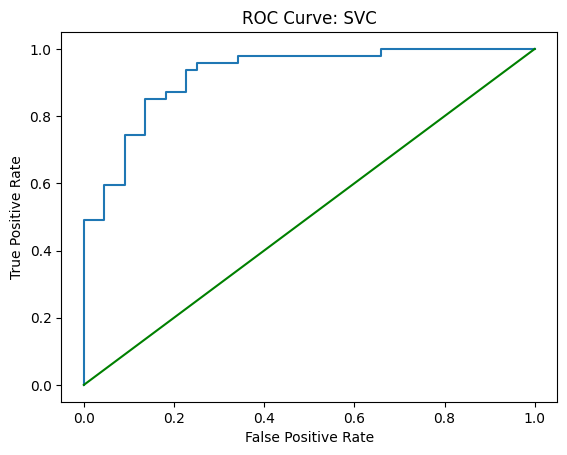

In [385]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],      
    'max_iter': [500, 1000],
    'class_weight': ['balanced']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(x_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

print("Logistic Regression Results:")
print("Best Parameters:", grid_search_lr.best_params_)

lr_model_predict = best_model_lr.predict(x_test)
lr_model_probs = best_model_lr.predict_proba(x_test)[:, 1]
lr_cross_valid = cross_val_score(best_model_lr, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, lr_model_predict):}")
print(f"Precision: {precision_score(y_test, lr_model_predict):}")
print(f"Recall: {recall_score(y_test, lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lr_model_probs)}")
print(f"K-fold cross validation accuracy: {lr_cross_valid}")
print(f"K-fold cross validation mean accuracy: {lr_cross_valid.mean()}")

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model_probs)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_dtc = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='roc_auc')
grid_search_dtc.fit(x_train, y_train)
best_model_dtc = grid_search_dtc.best_estimator_

print("Decision Tree Classifier Results:")
print("Best Parameters:", grid_search_dtc.best_params_)

dtc_model_predict = best_model_dtc.predict(x_test)
dtc_model_probs = best_model_dtc.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(best_model_dtc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross validation accuracy: {dtc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring='roc_auc')
grid_search_rfc.fit(x_train, y_train)
best_model_rfc = grid_search_rfc.best_estimator_

print("Random Forest Classifier Results:")
print("Best Parameters:", grid_search_rfc.best_params_)

rfc_model_predict = best_model_rfc.predict(x_test)
rfc_model_probs = best_model_rfc.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(best_model_rfc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross validation accuracy: {rfc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc')
grid_search_svc.fit(x_train, y_train)
best_model_svc = grid_search_svc.best_estimator_

print("SVC Results:")
print("Best Parameters:", grid_search_svc.best_params_)

svc_model_predict = best_model_svc.predict(x_test)
svc_model_probs = best_model_svc.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(best_model_svc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross validation accuracy: {svc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [386]:
choose_model = [
    ("Logistic Regression", f1_score(y_test, lr_model_predict), roc_auc_score(y_test, lr_model_probs)),
    ("Decision Tree Classifier", f1_score(y_test, dtc_model_predict), roc_auc_score(y_test, dtc_model_probs)),
    ("Random Forest Classifier", f1_score(y_test, rfc_model_predict), roc_auc_score(y_test, rfc_model_probs)),
    ("SVC", f1_score(y_test, svc_model_predict), roc_auc_score(y_test, svc_model_probs)),
]

choose_model.sort(key=lambda x: (x[1], x[2]), reverse=True)

best_model, best_f1, best_auc = choose_model[0]

print(f"Best Performing Model: {best_model}")

with open("model.pkl", "wb") as f:
    if best_model == "Logistic Regression":
        pickle.dump(best_model_lr, f)
    elif best_model == "Decision Tree Classifier":
        pickle.dump(best_model_dtc, f)
    elif best_model == "Random Forest Classifier":
        pickle.dump(best_model_rfc, f)
    elif best_model == "SVC":
        pickle.dump(best_model_svc, f)


Best Performing Model: Logistic Regression


In [387]:
input_data = np.array([[1, -0.057027, 0, -1.538807, 0.354044, -0.161069, 0.204392, 1, 0, 0, 0.6]])

with open('model.pkl', 'rb') as file:
    final_model = pickle.load(file)

prediction = best_model_svc.predict(input_data)[0]
prob = best_model_svc.predict_proba(input_data)[0][1]

if prediction == 1:
    print(f"High risk of heart disease with a {prob*100:.2f}% chance.")
else:
    print(f"No heart disease predicted. There is a {prob*100:.2f}% chance.")

High risk of heart disease with a 54.82% chance.


c:\Users\taurs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\taurs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
